In [1]:
#STUDENT NAME: SHRUTHI
#STUDENT ID: 801218392
#HOMEWORK 1 QUESTION 2

In [2]:
##  Please note that for this question, I used Autograd and SGD Optimizers

%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [4]:
#declared the model as given in the question
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [5]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
#Definiung the parameters, the loss variable and the predicted data- t_p
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # <1>
loss.backward()
optimizer.step()

params

tensor([ -1.7968, -16.3953,  -0.4818], requires_grad=True)

In [8]:
#Defining the training loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) # <1>
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss.item():.4f},")
            
    return params

In [9]:
                                            ### ***LEARNING RATE- 1e-1 ***

In [10]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un, # <1> 
    t_c = t_c)

Epoch 1, Training loss 675.7943,
Epoch 500, Training loss nan,
Epoch 1000, Training loss nan,
Epoch 1500, Training loss nan,
Epoch 2000, Training loss nan,
Epoch 2500, Training loss nan,
Epoch 3000, Training loss nan,
Epoch 3500, Training loss nan,
Epoch 4000, Training loss nan,
Epoch 4500, Training loss nan,
Epoch 5000, Training loss nan,


tensor([nan, nan, nan], requires_grad=True)

In [11]:
                                             ### ***LEARNING RATE- 1e-2 ***

In [12]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un, # <1> 
    t_c = t_c)

Epoch 1, Training loss 675.7943,
Epoch 500, Training loss nan,
Epoch 1000, Training loss nan,
Epoch 1500, Training loss nan,
Epoch 2000, Training loss nan,
Epoch 2500, Training loss nan,
Epoch 3000, Training loss nan,
Epoch 3500, Training loss nan,
Epoch 4000, Training loss nan,
Epoch 4500, Training loss nan,
Epoch 5000, Training loss nan,


tensor([nan, nan, nan], requires_grad=True)

In [13]:
                                         ### ***LEARNING RATE- 1e-3 ***

In [14]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, Training loss 675.7943,
Epoch 500, Training loss nan,
Epoch 1000, Training loss nan,
Epoch 1500, Training loss nan,
Epoch 2000, Training loss nan,
Epoch 2500, Training loss nan,
Epoch 3000, Training loss nan,
Epoch 3500, Training loss nan,
Epoch 4000, Training loss nan,
Epoch 4500, Training loss nan,
Epoch 5000, Training loss nan,


tensor([nan, nan, nan], requires_grad=True)

In [15]:
                                     ### ***LEARNING RATE- 1e-4 ***

In [16]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un, # <1> 
    t_c = t_c)

Epoch 1, Training loss 675.7943,
Epoch 500, Training loss 10.7086,
Epoch 1000, Training loss 8.6421,
Epoch 1500, Training loss 7.1710,
Epoch 2000, Training loss 6.1235,
Epoch 2500, Training loss 5.3772,
Epoch 3000, Training loss 4.8453,
Epoch 3500, Training loss 4.4658,
Epoch 4000, Training loss 4.1947,
Epoch 4500, Training loss 4.0008,
Epoch 5000, Training loss 3.8617,


tensor([-0.8881,  0.5570, -0.8753], requires_grad=True)

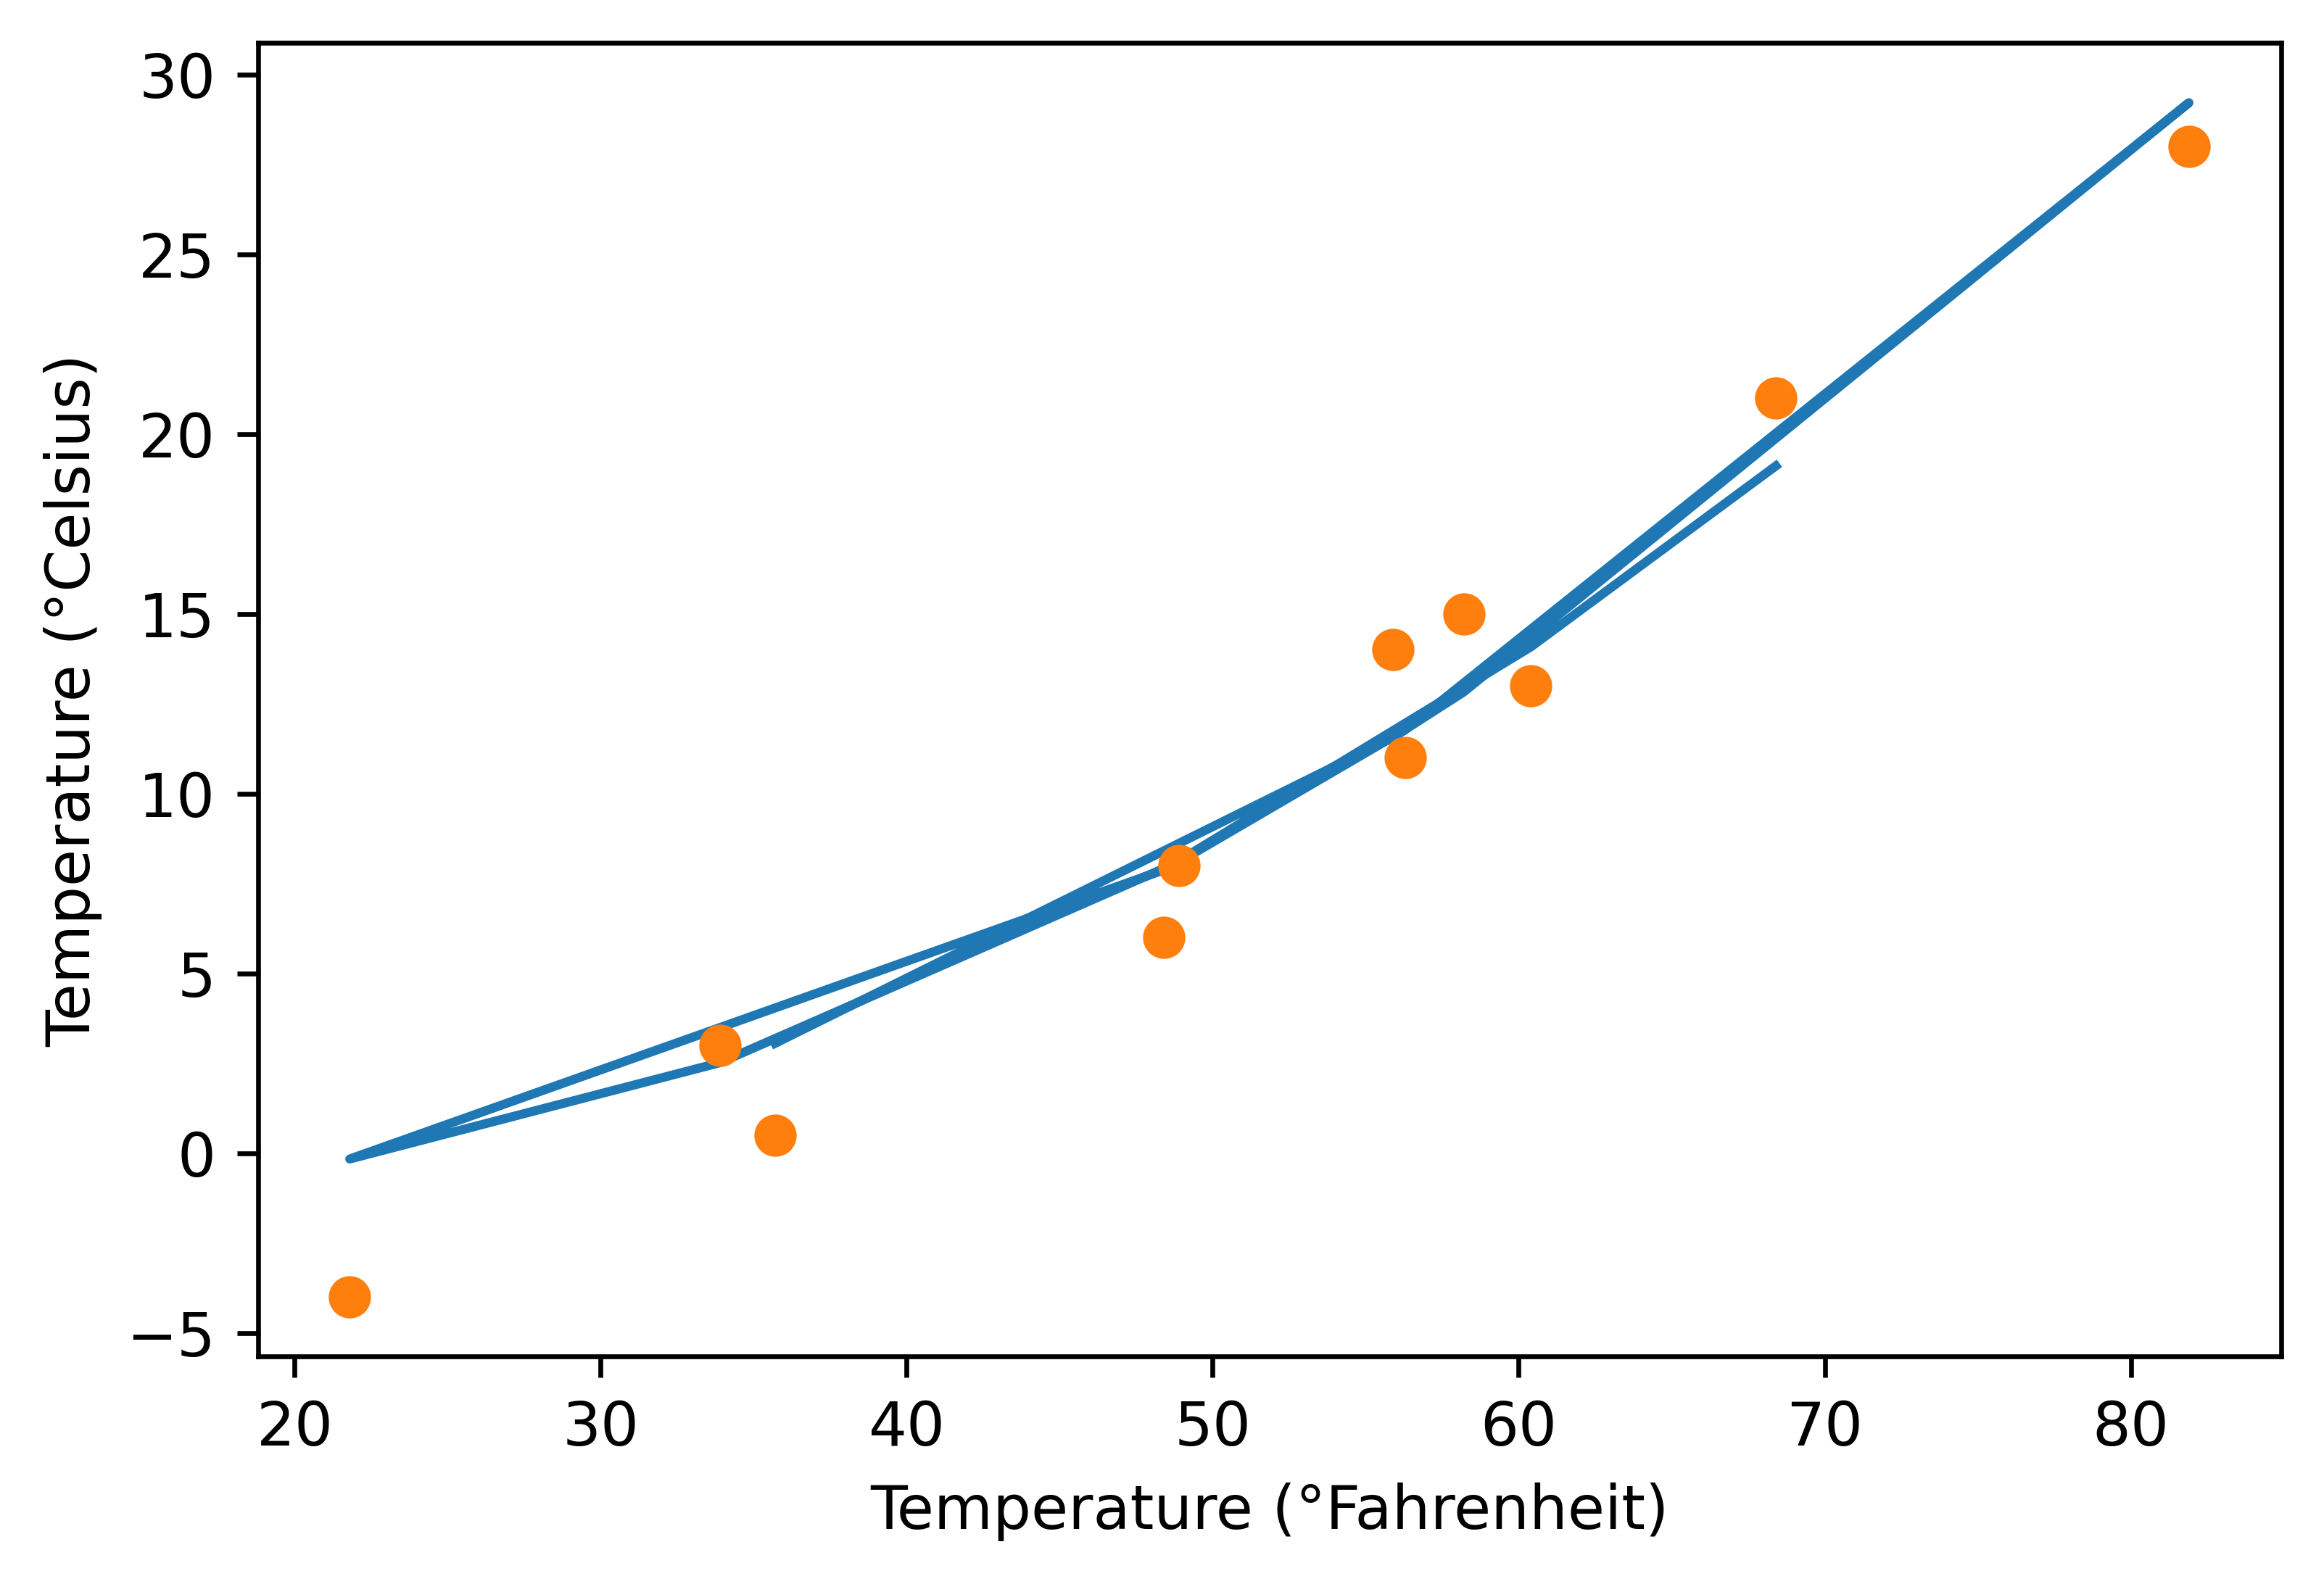

In [17]:
# Visualizing the predicted and actual values with learning rate 1e-4 as that has the least training loss. 

%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip